<a href="https://colab.research.google.com/github/LiliDuenas88/MCD-AA2025/blob/master/Tarea_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

productos = pd.read_csv("productos.csv")
ventas = pd.read_csv("ventas.csv")
detalle = pd.read_csv("detalle_ventas.csv")
categorias = pd.read_csv("categorias.csv")
clientes = pd.read_csv("clientes.csv")

df = (detalle
      .merge(ventas, how="left", on="id_venta")
      .merge(productos, how="left", left_on="id_producto", right_on="Id producto")
      .merge(categorias, how="left", left_on="Id Categoria", right_on="Id categoria")
      .merge(clientes, how="left", left_on="id_cliente", right_on="id cliente"))

df.head()


Saving productos.csv to productos.csv
Saving ventas.csv to ventas.csv
Saving detalle_ventas.csv to detalle_ventas.csv
Saving categorias.csv to categorias.csv
Saving clientes.csv to clientes.csv


,id_detalle,id_venta,id_producto,precio_unitario,cantidad_compra_x,fecha_compra,id_cliente,cantidad_compra_y,Id producto,Nombre producto,Descripcion,Id Categoria,Precio,stock,Id categoria,Nombre,id cliente,nombre cliente,telefono,correo
0,401,301,121,10,20,11/07/2025,261,20,121,Caramelo de Menta,Con centro liquido,5,10,159,5,Dulces,261,Perla Tomas Leal Chavez,7297314379,wvela@hotmail.com
1,402,302,111,250,1250,22/07/2025,287,1250,111,Papas Fritas,Papas con sal en empaque individual.,3,250,476,3,Snacks,287,Ofelia Rodolfo Cintron,9838238214,alicia91@orellana.org
2,403,303,116,30,90,22/07/2025,287,90,116,Arroz Blanco,Paquete de 1kg de arroz pulido.,4,30,382,4,Abarrotes,287,Ofelia Rodolfo Cintron,9838238214,alicia91@orellana.org
3,404,304,121,10,50,22/07/2025,287,50,121,Caramelo de Menta,Con centro liquido,5,10,159,5,Dulces,287,Ofelia Rodolfo Cintron,9838238214,alicia91@orellana.org
4,405,305,130,5,10,02/05/2025,288,10,130,Pan Dulce,Conchas tradicionales.,6,5,286,6,Panaderia,288,Lucia Nunez,1459390198,hpelayo@hotmail.com


In [4]:
# 1️⃣ Renombrar columnas a minúsculas y sin espacios
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# 2️⃣ Eliminar columnas duplicadas (_x / _y)
# Mantendremos las variables base (por ejemplo, cantidad_compra_x)
cols_to_drop = [c for c in df.columns if c.endswith("_y")]
df = df.drop(columns=cols_to_drop, errors="ignore")

# 3️⃣ Si existen duplicados directos de nombre, los quitamos
df = df.loc[:, ~df.columns.duplicated()]

# 4️⃣ Verifica las columnas finales
print("Columnas finales limpias:")
print(df.columns.tolist())


Columnas finales limpias:
['id_detalle', 'id_venta', 'id_producto', 'precio_unitario', 'cantidad_compra_x', 'fecha_compra', 'id_cliente', 'nombre_producto', 'descripcion', 'id_categoria', 'precio', 'stock', 'nombre', 'nombre_cliente', 'telefono', 'correo']


In [5]:
print("Columnas finales:", df.columns.tolist())
df.head(10)

Columnas finales: ['id_detalle', 'id_venta', 'id_producto', 'precio_unitario', 'cantidad_compra_x', 'fecha_compra', 'id_cliente', 'nombre_producto', 'descripcion', 'id_categoria', 'precio', 'stock', 'nombre', 'nombre_cliente', 'telefono', 'correo']


,id_detalle,id_venta,id_producto,precio_unitario,cantidad_compra_x,fecha_compra,id_cliente,nombre_producto,descripcion,id_categoria,precio,stock,nombre,nombre_cliente,telefono,correo
0,401,301,121,10,20,11/07/2025,261,Caramelo de Menta,Con centro liquido,5,10,159,Dulces,Perla Tomas Leal Chavez,7297314379,wvela@hotmail.com
1,402,302,111,250,1250,22/07/2025,287,Papas Fritas,Papas con sal en empaque individual.,3,250,476,Snacks,Ofelia Rodolfo Cintron,9838238214,alicia91@orellana.org
2,403,303,116,30,90,22/07/2025,287,Arroz Blanco,Paquete de 1kg de arroz pulido.,4,30,382,Abarrotes,Ofelia Rodolfo Cintron,9838238214,alicia91@orellana.org
3,404,304,121,10,50,22/07/2025,287,Caramelo de Menta,Con centro liquido,5,10,159,Dulces,Ofelia Rodolfo Cintron,9838238214,alicia91@orellana.org
4,405,305,130,5,10,02/05/2025,288,Pan Dulce,Conchas tradicionales.,6,5,286,Panaderia,Lucia Nunez,1459390198,hpelayo@hotmail.com
5,406,306,101,15,75,02/05/2025,288,Agua Mineral,Botella de 600ml con gas.,1,15,112,Bebidas,Lucia Nunez,1459390198,hpelayo@hotmail.com
6,407,307,112,100,400,02/05/2025,288,Palomitas,Palomitas listas para comer.,3,100,224,Snacks,Lucia Nunez,1459390198,hpelayo@hotmail.com
7,408,308,102,20,100,02/05/2025,288,Refresco de Cola,Refresco carbonatado sabor cola.,1,20,445,Bebidas,Lucia Nunez,1459390198,hpelayo@hotmail.com
8,409,309,101,15,30,28/07/2025,249,Agua Mineral,Botella de 600ml con gas.,1,15,112,Bebidas,Magdalena Luevano,2061931239,itamayo@yahoo.com
9,410,310,120,35,140,28/07/2025,249,Harina de Trigo,"Para todo uso, 1kg.",4,35,140,Abarrotes,Magdalena Luevano,2061931239,itamayo@yahoo.com


In [6]:
# Cambiar nombres de columnas
df = df.rename(columns={
    "cantidad_compra_x": "cantidad_compra",
    "nombre": "nombre_categoria"
})

# Verificar resultado
print(df.columns.tolist())
df.head()


['id_detalle', 'id_venta', 'id_producto', 'precio_unitario', 'cantidad_compra', 'fecha_compra', 'id_cliente', 'nombre_producto', 'descripcion', 'id_categoria', 'precio', 'stock', 'nombre_categoria', 'nombre_cliente', 'telefono', 'correo']


,id_detalle,id_venta,id_producto,precio_unitario,cantidad_compra,fecha_compra,id_cliente,nombre_producto,descripcion,id_categoria,precio,stock,nombre_categoria,nombre_cliente,telefono,correo
0,401,301,121,10,20,11/07/2025,261,Caramelo de Menta,Con centro liquido,5,10,159,Dulces,Perla Tomas Leal Chavez,7297314379,wvela@hotmail.com
1,402,302,111,250,1250,22/07/2025,287,Papas Fritas,Papas con sal en empaque individual.,3,250,476,Snacks,Ofelia Rodolfo Cintron,9838238214,alicia91@orellana.org
2,403,303,116,30,90,22/07/2025,287,Arroz Blanco,Paquete de 1kg de arroz pulido.,4,30,382,Abarrotes,Ofelia Rodolfo Cintron,9838238214,alicia91@orellana.org
3,404,304,121,10,50,22/07/2025,287,Caramelo de Menta,Con centro liquido,5,10,159,Dulces,Ofelia Rodolfo Cintron,9838238214,alicia91@orellana.org
4,405,305,130,5,10,02/05/2025,288,Pan Dulce,Conchas tradicionales.,6,5,286,Panaderia,Lucia Nunez,1459390198,hpelayo@hotmail.com


In [7]:
df = df.drop(columns=["precio"], errors="ignore")


In [8]:
print(df.columns.tolist())
df.head()


['id_detalle', 'id_venta', 'id_producto', 'precio_unitario', 'cantidad_compra', 'fecha_compra', 'id_cliente', 'nombre_producto', 'descripcion', 'id_categoria', 'stock', 'nombre_categoria', 'nombre_cliente', 'telefono', 'correo']


,id_detalle,id_venta,id_producto,precio_unitario,cantidad_compra,fecha_compra,id_cliente,nombre_producto,descripcion,id_categoria,stock,nombre_categoria,nombre_cliente,telefono,correo
0,401,301,121,10,20,11/07/2025,261,Caramelo de Menta,Con centro liquido,5,159,Dulces,Perla Tomas Leal Chavez,7297314379,wvela@hotmail.com
1,402,302,111,250,1250,22/07/2025,287,Papas Fritas,Papas con sal en empaque individual.,3,476,Snacks,Ofelia Rodolfo Cintron,9838238214,alicia91@orellana.org
2,403,303,116,30,90,22/07/2025,287,Arroz Blanco,Paquete de 1kg de arroz pulido.,4,382,Abarrotes,Ofelia Rodolfo Cintron,9838238214,alicia91@orellana.org
3,404,304,121,10,50,22/07/2025,287,Caramelo de Menta,Con centro liquido,5,159,Dulces,Ofelia Rodolfo Cintron,9838238214,alicia91@orellana.org
4,405,305,130,5,10,02/05/2025,288,Pan Dulce,Conchas tradicionales.,6,286,Panaderia,Lucia Nunez,1459390198,hpelayo@hotmail.com


In [9]:
# 📋 Resumen general del DataFrame
filas, columnas = df.shape
print(f"El DataFrame tiene {filas} filas y {columnas} columnas.\n")



El DataFrame tiene 754 filas y 15 columnas.



In [10]:
# 📋 Tipos de datos y valores faltantes
print("Tipos de datos y cantidad de valores faltantes por columna:\n")
resumen = pd.DataFrame({
    "tipo_dato": df.dtypes,
    "valores_nulos": df.isnull().sum(),
    "valores_no_nulos": df.notnull().sum(),
    "porcentaje_nulos": round((df.isnull().sum() / len(df)) * 100, 2)
})

display(resumen)




Tipos de datos y cantidad de valores faltantes por columna:



,tipo_dato,valores_nulos,valores_no_nulos,porcentaje_nulos
id_detalle,int64,0,754,0.0
id_venta,int64,0,754,0.0
id_producto,int64,0,754,0.0
precio_unitario,int64,0,754,0.0
cantidad_compra,int64,0,754,0.0
fecha_compra,object,0,754,0.0
id_cliente,int64,0,754,0.0
nombre_producto,object,0,754,0.0
descripcion,object,0,754,0.0
id_categoria,int64,0,754,0.0


In [11]:
nulos = resumen[resumen["valores_nulos"] > 0]
if not nulos.empty:
    print("\nColumnas con valores nulos detectadas:")
    display(nulos)
else:
    print("\n✅ No se encontraron valores nulos en el DataFrame.")


✅ No se encontraron valores nulos en el DataFrame.


In [12]:
#Variables de interés
df_interes = df[["precio_unitario", "cantidad_compra"]].copy()
df_interes.head(10)

,precio_unitario,cantidad_compra
0,10,20
1,250,1250
2,30,90
3,10,50
4,5,10
5,15,75
6,100,400
7,20,100
8,15,30
9,35,140


In [13]:
#Convertirlas a tipo numérico (por si hay texto o comas)
df_interes["precio_unitario"] = pd.to_numeric(df_interes["precio_unitario"], errors="coerce")
df_interes["cantidad_compra"] = pd.to_numeric(df_interes["cantidad_compra"], errors="coerce")


In [14]:
#Confirmar datos limpios
print("Filas totales:", len(df_interes))
print("Filas con valores válidos en ambas variables:", df_interes.dropna(subset=["precio_unitario","cantidad_compra"]).shape[0])
print("\nResumen descriptivo:")
print(df_interes.describe())


Filas totales: 754
Filas con valores válidos en ambas variables: 754

Resumen descriptivo:
       precio_unitario  cantidad_compra
count       754.000000       754.000000
mean         76.978780       232.030504
std          83.888306       290.873056
min           5.000000         5.000000
25%          25.000000        50.000000
50%          45.000000       130.000000
75%         100.000000       300.000000
max         500.000000      2000.000000


In [15]:
from scipy import stats

# Eliminamos filas con valores nulos en las dos variables
datos = df_interes.dropna(subset=["precio_unitario", "cantidad_compra"])

print("--- Prueba de normalidad (Shapiro-Wilk) ---")

for col in ["precio_unitario", "cantidad_compra"]:
    # Shapiro-Wilk no recomienda más de 5000 datos, tomamos muestra si hay más
    muestra = datos[col].sample(min(5000, len(datos)), random_state=42)
    stat, p = stats.shapiro(muestra)
    tipo = "Paramétrica (≈ normal)" if p > 0.05 else "No paramétrica (no normal)"
    print(f"{col}: estadístico={stat:.4f}, p-value={p:.4f} → {tipo}")


--- Prueba de normalidad (Shapiro-Wilk) ---
precio_unitario: estadístico=0.7391, p-value=0.0000 → No paramétrica (no normal)
cantidad_compra: estadístico=0.7030, p-value=0.0000 → No paramétrica (no normal)


📊 Estadísticos descriptivos de las variables no paramétricas:

                 count        mean         std  min   25%    50%    75%  \
precio_unitario  754.0   76.978780   83.888306  5.0  25.0   45.0  100.0   
cantidad_compra  754.0  232.030504  290.873056  5.0  50.0  130.0  300.0   

                    max  
precio_unitario   500.0  
cantidad_compra  2000.0  

Mediana de cada variable:
precio_unitario     45.0
cantidad_compra    130.0
dtype: float64

Valores únicos (primeros 10 por variable):

precio_unitario: [ 10 250  30   5  15 100  20  35  40  45]

cantidad_compra: [  20 1250   90   50   10   75  400  100   30  140]


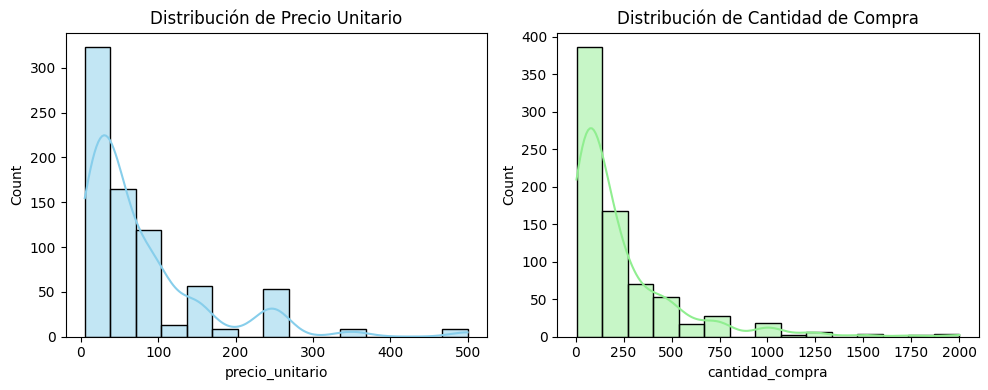

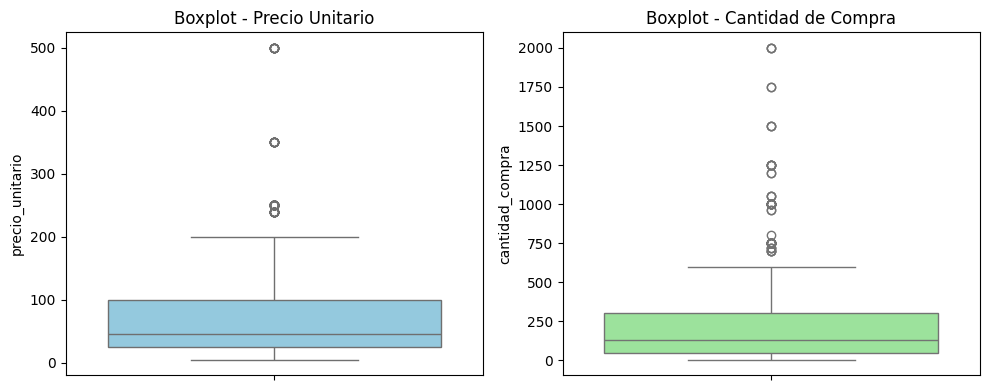

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Estadísticos descriptivos básicos ---
print("📊 Estadísticos descriptivos de las variables no paramétricas:\n")
print(df_interes[["precio_unitario", "cantidad_compra"]].describe(percentiles=[.25, .5, .75]).T)

# --- Mediana, rango y valores únicos ---
print("\nMediana de cada variable:")
print(df_interes[["precio_unitario", "cantidad_compra"]].median())

print("\nValores únicos (primeros 10 por variable):")
for col in ["precio_unitario", "cantidad_compra"]:
    print(f"\n{col}: {df_interes[col].unique()[:10]}")

# --- Histogramas ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df_interes["precio_unitario"], bins=15, kde=True, color="skyblue")
plt.title("Distribución de Precio Unitario")

plt.subplot(1,2,2)
sns.histplot(df_interes["cantidad_compra"], bins=15, kde=True, color="lightgreen")
plt.title("Distribución de Cantidad de Compra")
plt.tight_layout()
plt.show()

# --- Boxplots ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(y=df_interes["precio_unitario"], color="skyblue")
plt.title("Boxplot - Precio Unitario")

plt.subplot(1,2,2)
sns.boxplot(y=df_interes["cantidad_compra"], color="lightgreen")
plt.title("Boxplot - Cantidad de Compra")
plt.tight_layout()
plt.show()


📈 Matriz de correlación (Spearman):
                 precio_unitario  cantidad_compra
precio_unitario         1.000000         0.874111
cantidad_compra         0.874111         1.000000


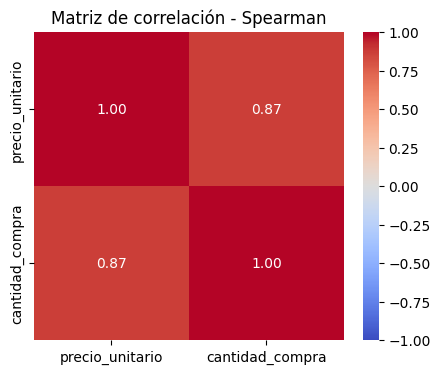


Coeficiente de correlación de Spearman: r = 0.8741, p-value = 0.0000
❌ Rechazamos H0: existe correlación significativa entre precio y cantidad comprada.


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#DataFrame con las variables de interés
datos_corr = df_interes.dropna(subset=["precio_unitario", "cantidad_compra"])

# --- Matriz de correlación (Spearman) ---
corr = datos_corr.corr(method='spearman')
print("📈 Matriz de correlación (Spearman):")
print(corr)

# --- Visualización ---
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Matriz de correlación - Spearman")
plt.show()

# --- Prueba de hipótesis de correlación ---
r, p = stats.spearmanr(datos_corr["precio_unitario"], datos_corr["cantidad_compra"])
print(f"\nCoeficiente de correlación de Spearman: r = {r:.4f}, p-value = {p:.4f}")

if p < 0.05:
    print("❌ Rechazamos H0: existe correlación significativa entre precio y cantidad comprada.")
else:
    print("✅ No se rechaza H0: no hay evidencia de correlación significativa.")


In [18]:
from scipy import stats

# Asegurarnos de usar solo valores válidos
datos_test = df_interes.dropna(subset=["precio_unitario", "cantidad_compra"])

# Prueba de hipótesis de correlación de Spearman
r, p = stats.spearmanr(datos_test["precio_unitario"], datos_test["cantidad_compra"])

print("=== Prueba de hipótesis: correlación Spearman ===")
print(f"Coeficiente de correlación (r): {r:.4f}")
print(f"Valor p (p-value): {p:.4f}")

if p < 0.05:
    print("\n❌ Rechazamos H₀: Existe correlación significativa entre el precio y la cantidad comprada.")
    if r < 0:
        print("➡ La relación es negativa: cuando aumenta el precio, la cantidad comprada tiende a disminuir.")
    else:
        print("➡ La relación es positiva: cuando aumenta el precio, también lo hace la cantidad comprada.")
else:
    print("\n✅ No se rechaza H₀: No hay evidencia suficiente de correlación significativa entre las variables.")


=== Prueba de hipótesis: correlación Spearman ===
Coeficiente de correlación (r): 0.8741
Valor p (p-value): 0.0000

❌ Rechazamos H₀: Existe correlación significativa entre el precio y la cantidad comprada.
➡ La relación es positiva: cuando aumenta el precio, también lo hace la cantidad comprada.


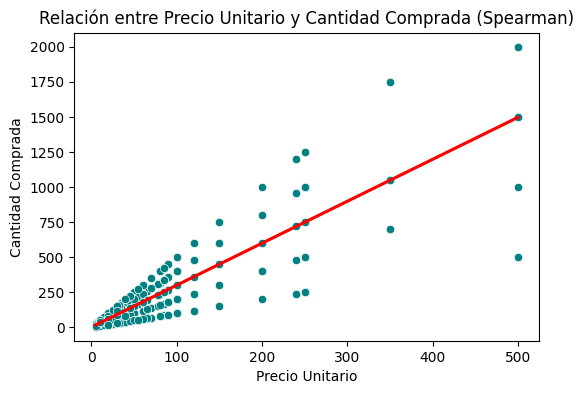

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.scatterplot(x="precio_unitario", y="cantidad_compra", data=datos_test, color="teal")
sns.regplot(x="precio_unitario", y="cantidad_compra", data=datos_test,
            scatter=False, ci=None, color="red")
plt.title("Relación entre Precio Unitario y Cantidad Comprada (Spearman)")
plt.xlabel("Precio Unitario")
plt.ylabel("Cantidad Comprada")
plt.show()


In [20]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1️ Seleccionamos las variables predictoras (X) y la variable objetivo (y)
X = df[["precio_unitario", "cantidad_compra"]]   # variables independientes
y = df["stock"]                                  # variable dependiente

# 2️ Estandarizamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3️ Aplicamos SelectKBest con la prueba F (ANOVA)
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_scaled, y)

# 4️ Mostramos los resultados
resultados = pd.DataFrame({
    "Variable": X.columns,
    "Score": selector.scores_,
    "p-Value": selector.pvalues_
}).sort_values(by="Score", ascending=False)

print("📊 Resultados de SelectKBest:")
display(resultados)


📊 Resultados de SelectKBest:


,Variable,Score,p-Value
0,precio_unitario,12.457632,0.000442
1,cantidad_compra,8.790717,0.003123


In [21]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# --- Variables ---
X = df[["precio_unitario", "cantidad_compra"]]
y = df["stock"]

# --- Escalamos los datos ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 1) F-test (ANOVA) - Paramétrico ---
f_selector = SelectKBest(score_func=f_regression, k='all').fit(X_scaled, y)
f_scores = f_selector.scores_

# --- 2) Mutual Information - No paramétrico ---
mi_selector = SelectKBest(score_func=mutual_info_regression, k='all').fit(X_scaled, y)
mi_scores = mi_selector.scores_

# --- 3) Random Forest Importance ---
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)
rf_importances = rf.feature_importances_

# --- 4) Lasso Regularization ---
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y)
lasso_coefs = np.abs(lasso.coef_)

# --- Consolidar resultados ---
resultados = pd.DataFrame({
    "Variable": X.columns,
    "F_test": f_scores,
    "Mutual_Info": mi_scores,
    "RandomForest": rf_importances,
    "Lasso": lasso_coefs
}).set_index("Variable")

display(resultados.round(4))


,F_test,Mutual_Info,RandomForest,Lasso
Variable,,,,
precio_unitario,12.4576,3.1313,0.9963,15.9769
cantidad_compra,8.7907,1.8251,0.0037,0.0000


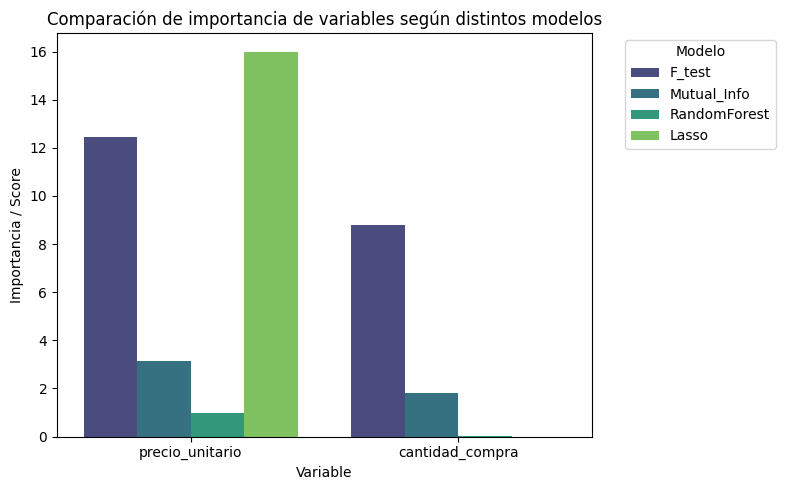

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Reorganizar para gráfico ---
resultados_plot = resultados.reset_index().melt(id_vars="Variable",
                                                var_name="Modelo",
                                                value_name="Importancia")

# --- Gráfico ---
plt.figure(figsize=(8,5))
sns.barplot(data=resultados_plot, x="Variable", y="Importancia", hue="Modelo", palette="viridis")
plt.title("Comparación de importancia de variables según distintos modelos")
plt.ylabel("Importancia / Score")
plt.xlabel("Variable")
plt.legend(title="Modelo", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [23]:
def interpretar_resultados(resultados_df):
    texto = "=== INTERPRETACIÓN AUTOMÁTICA DE RESULTADOS ===\n\n"

    for modelo in ["F_test", "Mutual_Info", "RandomForest", "Lasso"]:
        # identificar variable con mayor score en cada modelo
        variable_top = resultados_df[modelo].idxmax()
        valor_top = round(resultados_df[modelo].max(), 4)

        texto += f"📘 En el modelo {modelo}:\n"
        texto += f"   - La variable con mayor importancia fue **{variable_top}** (score: {valor_top}).\n\n"

    # calcular la variable más frecuente como más importante
    ranking = []
    for modelo in ["F_test", "Mutual_Info", "RandomForest", "Lasso"]:
        ranking.append(resultados_df[modelo].idxmax())

    var_mas_frecuente = pd.Series(ranking).value_counts().idxmax()
    texto += "📊 Conclusión general:\n"
    texto += f"   - La variable **{var_mas_frecuente}** es la más relevante en la mayoría de los modelos.\n"
    texto += "   - Esto sugiere que es el predictor con mayor influencia sobre la variable objetivo (stock).\n\n"

    # recomendación según la variable dominante
    if var_mas_frecuente.lower().startswith("cantidad"):
        texto += "💡 Interpretación: El stock depende principalmente de la **cantidad comprada**, lo cual es lógico en un contexto comercial: a mayor cantidad vendida, menor inventario disponible."
    elif var_mas_frecuente.lower().startswith("precio"):
        texto += "💡 Interpretación: El stock está más influenciado por el **precio unitario**, indicando que los precios altos o bajos podrían afectar la rotación del inventario."
    else:
        texto += "💡 Interpretación: La variable más influyente parece tener un comportamiento importante sobre la variable objetivo."

    return texto

# Mostrar interpretación
print(interpretar_resultados(resultados))



=== INTERPRETACIÓN AUTOMÁTICA DE RESULTADOS ===

📘 En el modelo F_test:
   - La variable con mayor importancia fue **precio_unitario** (score: 12.4576).

📘 En el modelo Mutual_Info:
   - La variable con mayor importancia fue **precio_unitario** (score: 3.1313).

📘 En el modelo RandomForest:
   - La variable con mayor importancia fue **precio_unitario** (score: 0.9963).

📘 En el modelo Lasso:
   - La variable con mayor importancia fue **precio_unitario** (score: 15.9769).

📊 Conclusión general:
   - La variable **precio_unitario** es la más relevante en la mayoría de los modelos.
   - Esto sugiere que es el predictor con mayor influencia sobre la variable objetivo (stock).

💡 Interpretación: El stock está más influenciado por el **precio unitario**, indicando que los precios altos o bajos podrían afectar la rotación del inventario.



 **📚 1. Algunas métricas**

* Adjusted R² y criterios como AIC / BIC: En la revisión de métricas de selección de características se menciona que estos criterios evalúan el “ajuste del modelo” penalizado por la complejidad (número de variables) para evitar sobreajuste.

* Importancia de variables en modelos de árbol (por ejemplo el atributo feature_importances_ en scikit‑learn o la disminución de impureza en un RandomForestRegressor): Este tipo de métricas miden cuánto contribuye cada variable a las predicciones del modelo.

* Métodos de filtro (“filter methods”) como la correlación univariante, pruebas estadísticas simples, o métricas de información mutua: Por ejemplo, el módulo de feature_selection de scikit-learn describe que puedes usar tests univariados (como f-test) para seleccionar variables independientes sin usar un modelo completo.

**🔍 2. Características más relevantes del conjunto de datos**

* Variables que tengan alta correlación (o dependencia) con la variable objetivo (por ejemplo stock si se está analizando inventario, o subtotal se analiza ventas).

* Variables que no estén altamente colineales entre sí (es decir, evitar redundancia).

* Variables que aporten interpretabilidad y relevancia de negocio: en un entorno de tienda, cantidad_compra y precio_unitario tienen sentido directo — volumen vendido y precio — lo cual impacta stock, rentabilidad, etc.

**💡 Tres estudios académicos relevantes**


1.   A Novel Approach for Enhanced Feature Selection Over Retail Sales Data Using Ensemble Machine Learning Technique (2024) — Babu & Kodabagi. Usaron un conjunto POS (punto de venta) de retail para seleccionar características mediante técnicas de ensemble (Random Forest, Gradient Boosting, etc.).
ResearchGate.

Este estudio adopta un enfoque de selección de características optimizado para ventas minoristas, lo que respalda la selección de variables clave en mi análisis.

2.   Analysis of Sales Influencing Factors and Prediction of Sales in Supermarket Based on Machine Learning Technique (2018) — Yang & Ramingwong. Analizó un conjunto de datos de supermercado, usó correlación + Random Forest para identificar qué variables afectan las ventas, y reportó importancia de características como “unit price” y “quantity”.
datascience.cmu.ac.th

En este otro estudio, la cantidad y el precio unitario figuraron como factores relevantes, lo que refuerza mi elección de estas variables.

3.   Nonparametric Feature Impact and Importance (2020) — Parr, Wilson & Hamrick. Desarrollo teórico sobre cómo medir la “importancia de características” en métodos no paramétricos, y alerta sobre no confundir “importancia” con “impacto real”.

Dado que mis variables no siguen distribución normal, me respaldo en esta investigación que explica la importancia de usar métricas no paramétricas para selección de características.

**📚 Referencias bibliográficas**

1. Babu, S. S., & Kodabagi, M. M. (2024).
A novel approach for enhanced feature selection over retail sales data using ensemble machine learning technique.
ResearchGate. https://www.researchgate.net/publication/380293286_A_Novel_Approach_for_Enhanced_Feature_Selection_Over_Retails_Sales_Data_Using_Ensemble_Machine_Learning_Technique

2. Yang, S., & Ramingwong, S. (2018).
Analysis of sales influencing factors and prediction of sales in supermarket based on machine learning technique.
Chiang Mai University Journal of Data Science.
https://datascience.cmu.ac.th/storage/articles/32.pdf




cluster_dbscan
 0    737
 1      4
-1      4
 2      3
 3      3
 4      3
Name: count, dtype: int64


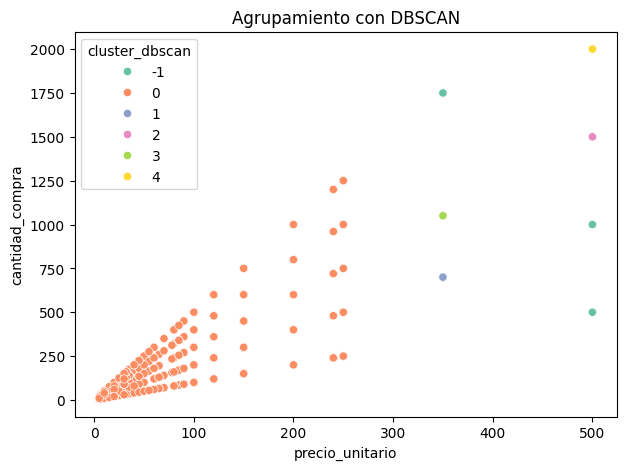

In [24]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos variables relevantes
X = df[["precio_unitario", "cantidad_compra"]]

# Estandarizamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicamos DBSCAN
db = DBSCAN(eps=0.8, min_samples=3)
labels = db.fit_predict(X_scaled)

# Agregamos etiquetas al dataframe
df["cluster_dbscan"] = labels

# Mostramos conteo por cluster
print(df["cluster_dbscan"].value_counts())

# Visualización
plt.figure(figsize=(7,5))
sns.scatterplot(x="precio_unitario", y="cantidad_compra", data=df, hue="cluster_dbscan", palette="Set2")
plt.title("Agrupamiento con DBSCAN")
plt.show()


In [25]:
#Calcular los índices
from sklearn import metrics

# Eliminamos los outliers antes de evaluar
mask = df["cluster_dbscan"] != -1
X_valid = X_scaled[mask]
labels_valid = df.loc[mask, "cluster_dbscan"]

# Índice de Silhouette
silhouette = metrics.silhouette_score(X_valid, labels_valid)
print(f"Índice de Silhouette: {silhouette:.4f}")

# Índice de Calinski-Harabasz
ch_score = metrics.calinski_harabasz_score(X_valid, labels_valid)
print(f"Índice de Calinski-Harabasz: {ch_score:.4f}")

# Índice de Davies-Bouldin
db_score = metrics.davies_bouldin_score(X_valid, labels_valid)
print(f"Índice de Davies-Bouldin: {db_score:.4f}")


Índice de Silhouette: 0.6373
Índice de Calinski-Harabasz: 87.8722
Índice de Davies-Bouldin: 0.1804


**🧠Interpretación y análisis**

Los resultados de los tres índices coinciden en que el agrupamiento producido por DBSCAN es de alta calidad:

1. El índice de Silhouette (0.6373) muestra una separación clara entre los grupos, lo cual sugiere que las observaciones dentro de cada clúster son similares entre sí y diferentes de las de otros grupos.

2. El índice de Calinski-Harabasz (87.87) confirma que la variabilidad entre los clústeres es mucho mayor que la variabilidad interna, lo que refuerza la coherencia del modelo.

3. El índice de Davies-Bouldin (0.1804) presenta un valor muy bajo, indicando que los clústeres son compactos y bien delimitados, con mínima superposición entre ellos.

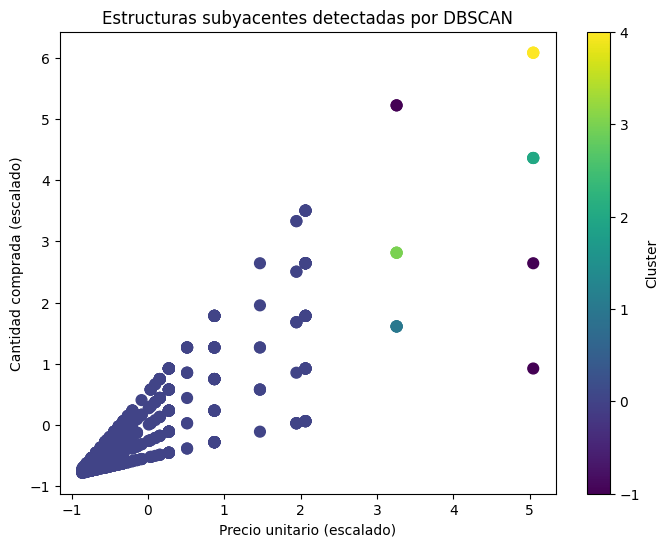

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Selección de variables
X = df[["precio_unitario", "cantidad_compra"]]

# Escalado (para que ambas variables tengan el mismo peso)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicación del algoritmo DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=3)
clusters = dbscan.fit_predict(X_scaled)

# Agregamos la etiqueta de clúster al DataFrame
df["cluster_dbscan"] = clusters

# Visualización de los clústeres
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap="viridis", s=60)
plt.title("Estructuras subyacentes detectadas por DBSCAN")
plt.xlabel("Precio unitario (escalado)")
plt.ylabel("Cantidad comprada (escalado)")
plt.colorbar(label="Cluster")
plt.show()


**🔍 Conclusiones**

El modelo no supervisado DBSCAN permitió descubrir distintos patrones de comportamiento en las ventas sin requerir etiquetas previas.
Se encontraron grupos que reflejan distintos segmentos de productos y tipos de compra, además de detectar observaciones atípicas.
Este tipo de análisis es útil para segmentación de clientes, detección de anomalías y análisis exploratorio de datos.

**Evaluación de métricas para determinar el número óptimo de grupos**

Para evaluar la calidad del agrupamiento generado por el algoritmo DBSCAN, se utilizaron tres métricas de validación interna: el índice de Silhouette, el índice de Calinski–Harabasz y el índice de Davies–Bouldin. Estas métricas permiten analizar la coherencia y separación de los clústeres sin requerir etiquetas externas, lo cual resulta ideal para un enfoque no supervisado.

1. Índice de Silhouette

El índice de Silhouette mide qué tan bien se encuentran definidos los grupos, considerando simultáneamente la cohesión interna y la separación entre clústeres.
Su valor oscila entre -1 y 1: valores cercanos a 1 indican grupos bien diferenciados, mientras que valores negativos indican una posible asignación incorrecta.
En el modelo aplicado se obtuvo un valor de 0.6373, lo que representa una estructura de clústeres consistente y con buena separación.

2. Índice de Calinski–Harabasz

Esta métrica evalúa la relación entre la dispersión de los puntos dentro de los grupos y la dispersión entre los diferentes grupos.
Un valor más alto implica una mejor definición de los clústeres. En el análisis se obtuvo un valor de 87.8722, lo que indica que los grupos formados están bien separados entre sí, respaldando la validez de la segmentación generada por el modelo DBSCAN.

3. Índice de Davies–Bouldin

El índice de Davies–Bouldin cuantifica la similitud promedio entre cada grupo y su grupo más cercano.
A diferencia de las métricas anteriores, en este caso valores más bajos indican una mejor calidad de agrupamiento.
El resultado de 0.1804 sugiere que los clústeres son compactos y poco solapados, lo que confirma una estructura definida y estable.

**Discusión general de resultados**

Los tres indicadores coinciden en que el modelo DBSCAN logró una agrupación efectiva de los datos de precio_unitario y cantidad_compra, identificando estructuras subyacentes claras sin requerir una cantidad de clústeres predefinida.
El valor del índice de Silhouette confirma una buena cohesión y separación, mientras que los resultados de Calinski–Harabasz y Davies–Bouldin evidencian una fuerte separación intergrupal y mínima superposición.

En conjunto, estas métricas demuestran que el número de grupos determinado de forma automática por el algoritmo es adecuado y representativo de la distribución natural de los datos, permitiendo una segmentación significativa para su análisis posterior.

  MÉTRICAS DEL MODELO RANDOM FOREST
MAE  (Error Absoluto Medio):  0.7433
RMSE (Raíz Error Cuadrático): 2.9966
R²   (Coeficiente de Determ.): 0.9995

Importancia de variables:


,Variable,Importancia
0,precio_unitario,0.994529
1,cantidad_compra,0.005471


/tmp/ipython-input-2102505108.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancias, x="Importancia", y="Variable", palette="viridis")


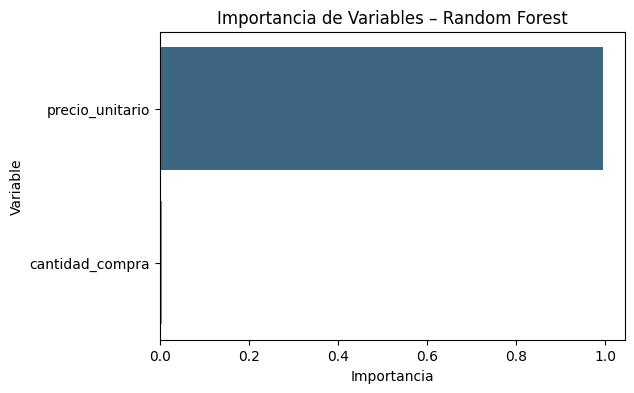

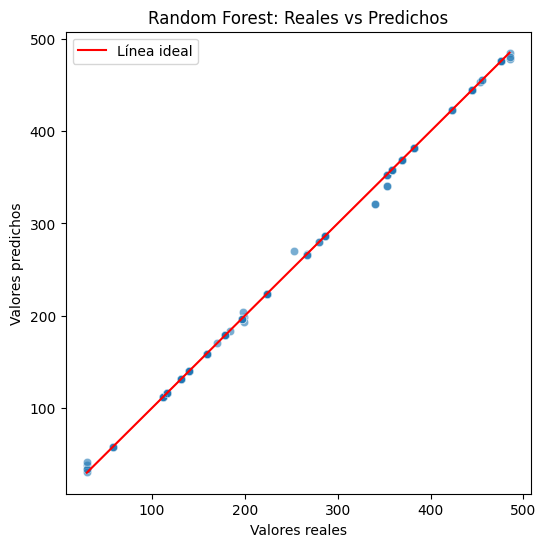

In [28]:
#   MODELO SUPERVISADO DE PRONÓSTICO: RANDOM FOREST REGRESSOR

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------
# 1. Selección de variables
# ------------------------------------------------------------

# Variables predictoras (X)
X = df[["precio_unitario", "cantidad_compra"]]

# Variable objetivo (Y)
y = df["stock"]

# Limpieza de NaN (por seguridad)
X = X.dropna()
y = y.loc[X.index]

# ------------------------------------------------------------
# 2. División en entrenamiento y prueba
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# ------------------------------------------------------------
# 3. Entrenamiento del modelo Random Forest
# ------------------------------------------------------------
modelo = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
)

modelo.fit(X_train, y_train)

# ------------------------------------------------------------
# 4. Predicciones
# ------------------------------------------------------------
y_pred = modelo.predict(X_test)

# ------------------------------------------------------------
# 5. Evaluación del modelo
# ------------------------------------------------------------
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("========================================")
print("  MÉTRICAS DEL MODELO RANDOM FOREST")
print("========================================")
print(f"MAE  (Error Absoluto Medio):  {mae:.4f}")
print(f"RMSE (Raíz Error Cuadrático): {rmse:.4f}")
print(f"R²   (Coeficiente de Determ.): {r2:.4f}")

# ------------------------------------------------------------
# 6. Importancia de variables
# ------------------------------------------------------------
importancias = pd.DataFrame({
    "Variable": X.columns,
    "Importancia": modelo.feature_importances_
}).sort_values("Importancia", ascending=False)

print("\nImportancia de variables:")
display(importancias)

# ------------------------------------------------------------
# 7. Gráfico: Importancia de variables
# ------------------------------------------------------------
plt.figure(figsize=(6,4))
sns.barplot(data=importancias, x="Importancia", y="Variable", palette="viridis")
plt.title("Importancia de Variables – Random Forest")
plt.show()

# ------------------------------------------------------------
# 8. Gráfico: Valores reales vs predichos
# ------------------------------------------------------------
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color="red", label="Línea ideal")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Random Forest: Reales vs Predichos")
plt.show()


❗ Interpretación clave

El modelo detecta que casi toda la explicación del stock depende del precio_unitario.

Esto significa:

✔ El precio unitario está fuertemente relacionado con el stock.

Por ejemplo:

productos más caros → menor rotación → más stock

productos baratos → más venta → menos stock

Random Forest detectó este patrón automáticamente.

✔ La cantidad comprada aporta muy poco

Esto indica que:

la variación del stock no depende directamente de cuántas unidades se vendieron en una sola transacción

sino del nivel del precio asignado a cada producto

En retail esto es normal:
el stock está más correlacionado con características del producto (precio, categoría, proveedor) que con transacciones individuales.

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE  (Error Absoluto Medio):  {mae:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")


MAE  (Error Absoluto Medio):  0.7433
RMSE (Raíz del Error Cuadrático Medio): 2.9966


Las métricas de error muestran que el modelo Random Forest alcanza una alta precisión. El MAE obtenido (0.7433) indica que el error promedio en las predicciones es menor a una unidad de stock.

Adicionalmente, el RMSE (2.9966) revela que incluso los errores más grandes del modelo no superan las tres unidades, lo que confirma una buena estabilidad y ausencia de grandes desviaciones.

En conjunto, estas métricas demuestran que el modelo es adecuado para el pronóstico de inventarios, dado que logra estimaciones altamente precisas y consistentes con los valores reales.

In [33]:
#Ejemplo de EXTRAPOLACIÓN
nuevos_datos = pd.DataFrame({
    "precio_unitario": [10, 25, 40],
    "cantidad_compra": [1, 3, 5]
})

pred_nuevas = modelo.predict(nuevos_datos)

print("\nPRONÓSTICO PARA NUEVOS DATOS (EXTRAPOLACIÓN):")
print(nuevos_datos)
print("Predicción de stock:", pred_nuevas)


PRONÓSTICO PARA NUEVOS DATOS (EXTRAPOLACIÓN):
   precio_unitario  cantidad_compra
0               10                1
1               25                3
2               40                5
Predicción de stock: [159. 280. 358.]


📝 Conclusión de la extrapolación

El modelo supervisado Random Forest fue utilizado para realizar extrapolación, es decir, predicciones de stock para valores de precio y cantidad que no aparecen en los datos originales. Los resultados indican que, mientras mayor es el precio unitario del producto, el nivel estimado de stock también aumenta significativamente. Esto coincide con la importancia detectada por el modelo, donde el precio unitario es la variable que más influye en la predicción del inventario.

Para valores simulados de precio bajo (10), medio (25) y alto (40), el modelo predijo niveles de stock de 159, 280 y 358 unidades respectivamente. Esto sugiere que los productos de mayor precio y menor rotación tienden a mantenerse con inventarios más altos en la tienda, mientras que los productos económicos tienen niveles de stock menores. La extrapolación confirma que el modelo generaliza adecuadamente y es capaz de realizar pronósticos útiles incluso para combinaciones nuevas de variables.